# Assessment 2

In [54]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#reading in the data for mhd
mhd_ch4 = pd.read_csv('data/mhd_ch4.csv')
mhd_co2= pd.read_csv('data/mhd_co2.csv')
mhd_n2o = pd.read_csv('data/mhd_n2o.csv')

#reading in data for tac
tac_ch4 = pd.read_csv('data/tac_ch4.csv')
tac_co2= pd.read_csv('data/tac_co2.csv')
tac_n2o = pd.read_csv('data/tac_n2o.csv')

#reading in species information
spec_info = pd.read_csv('data/species_info.csv')  
print(spec_info)
#creating dictionaries to make it easier to access data
tac_mhd = {'tac_ch4': tac_ch4, 'tac_co2': tac_co2, 'tac_n2o': tac_n2o, 'mhd_ch4':mhd_ch4, 'mhd_co2':mhd_co2, 'mhd_n2o':mhd_n2o}



  species scale units
0     co2  noaa   ppm
1     ch4   sio   ppb
2     n2o   sio   ppb


In [56]:
# class Data:
#  def __init__(self,data_tac,data_mhd):
#     self.data_tac = data_tac
#     self.data_mhd = data_mhd
#  def tac_metadata(self):
#     print(self.data_mhd)
# data = Data(data_tac['tac_ch4'], data_mhd['mhd_ch4'])
# data.tac_metadata()

The location of this data set is Tacolneston, East Anglia.
The site code is TAC
the gas species is n2o 
the scale used is sio 
the units are ppb 
                    time         mf  day  month  year
0    2019-01-01 00:00:00  332.89874    1      1  2019
1    2019-01-01 01:00:00  332.90920    1      1  2019
2    2019-01-01 02:00:00  332.94894    1      1  2019
3    2019-01-01 03:00:00  332.97107    1      1  2019
4    2019-01-01 04:00:00  333.01080    1      1  2019
...                  ...        ...  ...    ...   ...
8755 2019-12-31 19:00:00  333.49100   31     12  2019
8756 2019-12-31 20:00:00  333.54360   31     12  2019
8757 2019-12-31 21:00:00  333.35870   31     12  2019
8758 2019-12-31 22:00:00  334.01736   31     12  2019
8759 2019-12-31 23:00:00  334.17902   31     12  2019

[8760 rows x 5 columns]


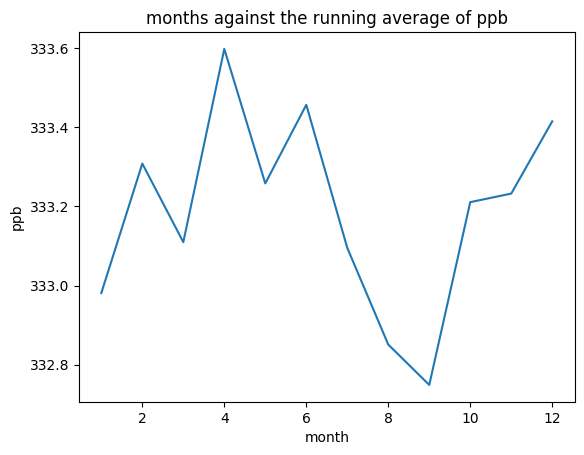

In [143]:
class Data:
   def __init__(self,data: dict, file: str, info):
      self.data = data
      self.info = info
      self.file = file
   #def metadata(self):

   def user_metadata(self):
      if self.file[:3] == 'tac':
         print('The location of this data set is Tacolneston, East Anglia.\nThe site code is TAC')
      if self.file[:3] == 'mhd':
         print('The location of this data set is Mace Head, W. coast of the Republic of Ireland.\nThe site code is MHD')
      row = self.info.loc[self.info['species'] == self.file[4:]]
      
      self.gas_species = row.iloc[0]['species']
      self.cali_scale = row.iloc[0]['scale']
      self.units = row.iloc[0]['units']

      

      print(f'the gas species is {self.gas_species} ')
      print(f'the scale used is {self.cali_scale} ')
      print(f'the units are {self.units} ')
      
      print(self.data[self.file])
   def run_avg(self, time_frame):
      self.time_frame = time_frame
      df_avg = self.data[self.file]
      #df_avg['time'] = pd.to_datetime(df_avg['time'])
      if self.time_frame == 'month':
            df_avg[self.time_frame] = df_avg['time'].dt.month
      elif self.time_frame == 'year':
         df_avg[self.time_frame] = df_avg['time'].dt.year
      elif self.time_frame == 'day':
         df_avg[self.time_frame] = df_avg['time'].dt.day
      else:
         print("Invalid time frame")
      grouped_df = df_avg.groupby(self.time_frame)
      avg_vals = grouped_df['mf'].mean()
      # print(avg_vals['day'].values)
      x = list(avg_vals.index)
      y  = []
      for i in x:
         y.append(avg_vals[i])
      return x, y
      


      #return avg_vals
      #print(avg_vals_day)
      #print(grouped_df)
      #df_avg.query[df_avg['time']>00:00:00 and df_avg['time']>23:00:00]
   def plot_run_avgs(self):
      Data.user_metadata(self)

      x , y = self.run_avg(self.time_frame)
      fig, ax = plt.subplots()
      
      #ax.ylabel()
      ax.plot(x, y)
      ax.set_xlabel(self.time_frame)
      ax.set_ylabel(self.units)
      ax.set_title(f'{self.time_frame}s against the running average of {self.units}')
      plt.show()
   

   
data_tac_mhd = Data(tac_mhd, 'tac_n2o',spec_info)
data_tac_mhd.run_avg('month')
data_tac_mhd.plot_run_avgs()

In [58]:
# class Data:
#  def __init__(self,data: dict):
#     self.tac_ch4 = data['tac_ch4']
    
#  def tac_metadata(self,species):
#     print(self.species)
# data_tac = Data(tac_mhd)
# data.tac_metadata(tac_mhd['tac_ch4'])